# Rancher Prometheus report


In [1]:
%matplotlib inline
import prometheus_pandas.ipython.magic

In [2]:
%%prometheus_query_range http://prom.csdemo.csk8s.ch 2024-06-09T00:00:00Z 2024-06-17T00:00:00Z  1d data
  sum(node_namespace_pod_container:container_cpu_usage_seconds_total:sum_irate{cluster="", namespace="shop"}) by (pod) 

In [3]:
#print(data)

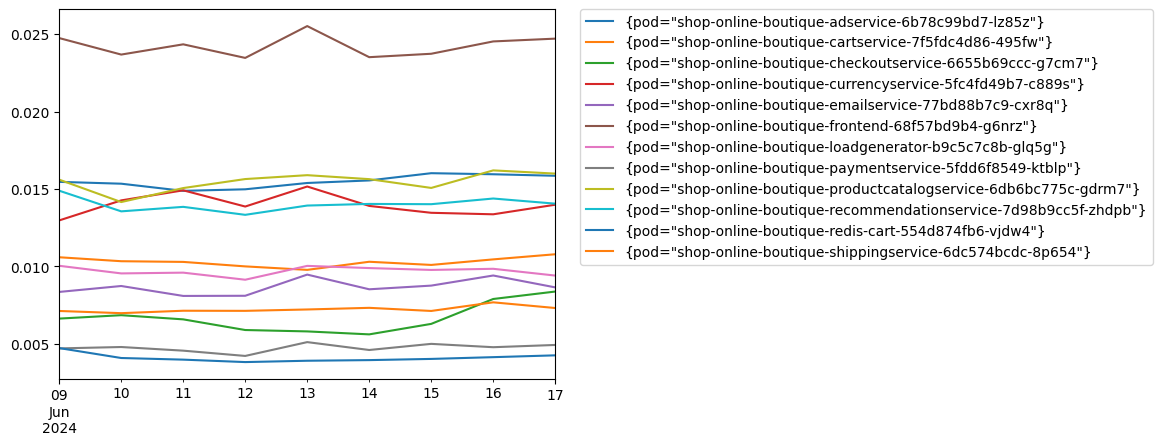

In [4]:
data.plot().legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

## Average container network bandwidth  by workload

In [5]:
%%prometheus_query_range  http://prom.csdemo.csk8s.ch 2024-06-18T17:17:38.463Z 2024-06-18T21:17:38.463Z 1h data
(avg(irate(container_network_receive_bytes_total{job="kubelet", metrics_path="/metrics/cadvisor", cluster="", namespace="shop"}[1h])
 * on (namespace,pod) group_left(workload,workload_type) namespace_workload_pod:kube_pod_owner:relabel{cluster="", namespace="shop", workload=~".+", workload_type="deployment"}) by (workload))


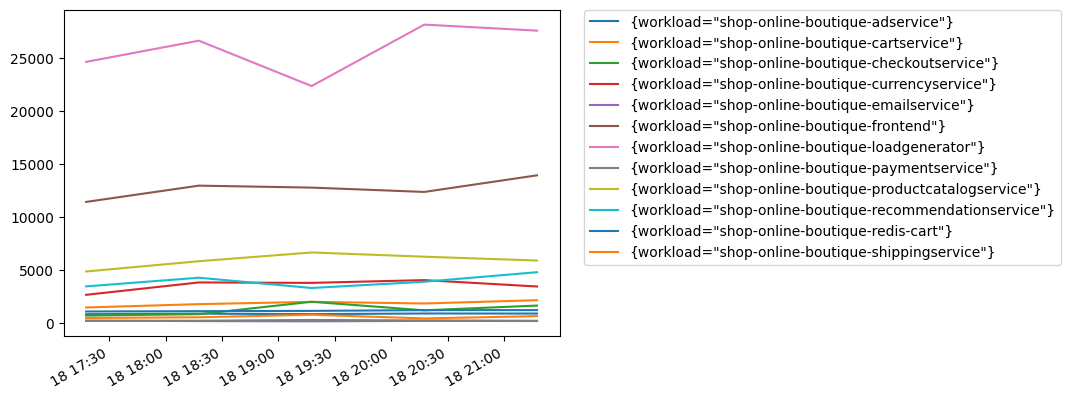

In [6]:
data.plot().legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)